In [310]:
#Lina Saikute, x20142919#

In [2]:
#import pymongo
import pandas as pd
#from pymongo import MongoClient
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import os
import matplotlib.pyplot as plt
import statistics
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [3]:
# Loading or Opening the json file
with open('price_index.json') as file:
        data = json.load(file)

In [206]:
#MongoDB creation

client = MongoClient()

In [207]:
# connect to a Mongo client. This connects on the default host and port)
from pymongo import MongoClient
client = MongoClient('mongodb://192.168.56.30:27017')

In [208]:
# creating database 
db = client["price-index"]


In [209]:
#add a collection to that database
collection = db['data_collection']



In [356]:
#create document
import datetime
post = {"Sector": "Rural",
        "Year": 2013,
        "Month": "January",
        "Cereals and products": 107.5,
        "Meat and fish": 106.3,
        "Egg": 108.1,
        "Milk and products": 104.9,
        "Oils and fats": 106.1,
        "Fruits": 103.9,
        "Vegetables": 101.9,
        "Pulses and products": 106.1,
        "Sugar and Confectionery": 106.8,
        "Spices": 103.1,
        "Non-alcoholic beverages": 104.8,
        "Prepared meals, snacks, sweets etc.": 106.7,
        "Food and beverages": 105.5,
        "Pan, tobacco and intoxicants": 105.1,
        "Clothing": 106.5,
        "Footwear": 105.8,
        "Clothing and footwear": 106.4,
        "Housing": "",
        "Fuel and light": 105.5,
        "Household goods and services": 104.8,
        "Health": 104,
        "Transport and communication": 103.3,
        "Recreation and amusement": 103.4,
        "Education": 103.8,
        "Personal care and effects": 104.7,
        "Miscellaneous": 104,
        "General index": 105.1}

In [3]:
##To insert a single document into a collection##
posts = db.posts
post_id = posts.insert_one(post).inserted_id
post_id

##Retrieving document
import pprint
pprint.pprint(posts.find_one())

In [210]:
posts = db.posts

In [211]:
##Count documents
posts.count_documents({})

129

In [212]:
##Conect collection with database
data = db.posts

In [213]:
##Convert collection to dataframe
#import pandas as pd
data = pd.DataFrame(list(data.find()))


In [214]:
data

,_id,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,62698970c8b5e47aed91b4a6,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,...,,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,62698976c8b5e47aed91b4a7,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,62698978c8b5e47aed91b4a8,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,62698979c8b5e47aed91b4a9,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,...,,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,6269897bc8b5e47aed91b4aa,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,62698a3ac8b5e47aed91b522,Urban,2016,June,125.9,143.9,130.9,131.0,110.2,135.5,...,125.5,115.5,123.2,120.6,112.3,119.9,129.3,118.8,119.6,128.1
125,62698a3cc8b5e47aed91b523,Rural+Urban,2016,June,127.7,140.5,128.3,132.6,115.5,136.5,...,125.5,123.3,126.4,124.1,114.2,121.7,129.7,119.4,121.5,130.1
126,62698a3dc8b5e47aed91b524,Rural,2016,July,129.3,139.5,129.6,134.5,119.5,138.5,...,NA,128.2,130.0,126.7,116.4,125.2,130.8,120.9,123.8,133.0
127,62698a3ec8b5e47aed91b525,Urban,2016,July,126.8,144.2,136.6,131.8,111.0,137.0,...,126.4,115.5,123.5,120.9,111.7,120.3,130.8,120.0,119.9,129.0


In [215]:
#DATA PREPROCEESING

In [216]:
#Data cleaning, detecting missing value
#sum of missing values
pd.isnull(data).sum().sum()

0

In [217]:
#Detect a list of missing values
missing_vals = ["NA", "", None, np.NaN]
missing = data.isin(missing_vals)
missing.head()


,_id,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [218]:
#Column Housing missing values
print(data['Housing'])

0           
1      100.3
2      100.3
3           
4      100.4
       ...  
124    125.5
125    125.5
126       NA
127    126.4
128    126.4
Name: Housing, Length: 129, dtype: object


In [219]:
#Convert column housing type 
data["Housing"] = pd.to_numeric(data.Housing, errors='coerce')

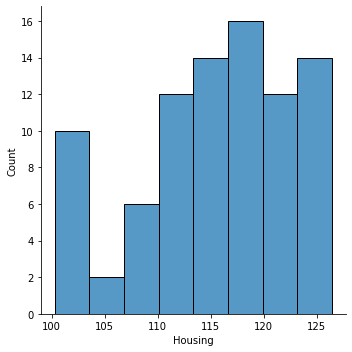

In [220]:
#Histogram distribution plot for decision making whether to use mean, media or mode
sns.displot(data.Housing)

In [221]:
# Replace Blank values with DataFrame.replace() methods.
data = data.replace(r'^\s*$', np.nan, regex=True)
print(data['Housing'].dtype)

float64


In [222]:
#Replace missing value with mean
x = data["Housing"].mean()
data["Housing"].fillna(x, inplace = True)

In [223]:
#Rename names of columns
data.rename(columns = {'General index':'CPI'}, inplace = True)#Rename names of columns

In [224]:
#Create dataframe for future analysis
data1 = pd.DataFrame([data.Year, data.Month, data.CPI]).transpose()

In [225]:
#Convert variable year 
data1['Year'].astype(float).astype('Int64')

0      2013
1      2013
2      2013
3      2013
4      2013
       ... 
124    2016
125    2016
126    2016
127    2016
128    2016
Name: Year, Length: 129, dtype: Int64

In [226]:
#Create dictionary, change month names to numbers
mydict = {"January":"01","February":"02","March":"03","April":"04","May":"05","June":"06","July":"07","August":"08","September":"09","October":"10","November":"11","December":"12"}

In [227]:
#Replace month names to month number
data1.Month = data1.Month.map(mydict)

In [228]:
#Convertting date to appropriate format 
data1['Date'] = data1['Year'].astype(str) + '-' + data1['Month']
data1

,Year,Month,CPI,Date
0,2013,01,105.1,2013-01
1,2013,01,104.0,2013-01
2,2013,01,104.6,2013-01
3,2013,02,105.8,2013-02
4,2013,02,104.7,2013-02
...,...,...,...,...
124,2016,06,128.1,2016-06
125,2016,06,130.1,2016-06
126,2016,07,133.0,2016-07
127,2016,07,129.0,2016-07


In [229]:
# Add  a new "Date" column
data1['Date'] = pd.to_datetime(data1['Date'], format='%Y-%m')
#Converting date to appropriate format 
data1['Date'] = data1['Year'].astype(str) + '-' + data1['Month']

print(data1.head())

   Year Month    CPI     Date
0  2013    01  105.1  2013-01
1  2013    01  104.0  2013-01
2  2013    01  104.6  2013-01
3  2013    02  105.8  2013-02
4  2013    02  104.7  2013-02


In [230]:
#group data by years 
newdata = data1.groupby('Date', as_index = False).agg({'CPI': 'sum'})

In [231]:
# assign index for dataframe
newdata.index = newdata.Date
del newdata['Date']
print(newdata.head())

           CPI
Date          
2013-01  313.7
2013-02  315.8
2013-03  316.5
2013-04  318.2
2013-05  320.7


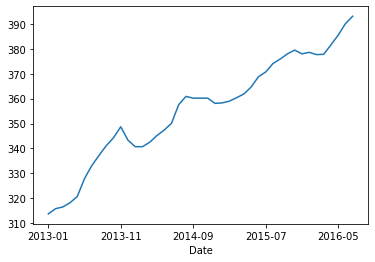

In [232]:
from matplotlib import pyplot
series = newdata.CPI
series.plot()
pyplot.show()

In [233]:
# Assign columns for future analysis
newdata = pd.DataFrame([data1.Date, data1.CPI]).transpose()

In [234]:
newdata

,Date,CPI
0,2013-01,105.1
1,2013-01,104.0
2,2013-01,104.6
3,2013-02,105.8
4,2013-02,104.7
...,...,...
124,2016-06,128.1
125,2016-06,130.1
126,2016-07,133.0
127,2016-07,129.0


In [235]:
#Group data by years 
newdata = data1.groupby('Date', as_index = False).agg({'CPI': 'sum'})

In [236]:
#Convert "CPI variable" from objects to float
newdata['CPI'] = newdata['CPI'].astype(float)
print(newdata.dtypes)


Date     object
CPI     float64
dtype: object


In [237]:
newdata.CPI.describe()

count     43.000000
mean     355.767442
std       21.341071
min      313.700000
25%      341.800000
50%      359.000000
75%      375.000000
max      393.100000
Name: CPI, dtype: float64

In [238]:
# Build ARIMA model

In [239]:
#Stionary Dickey-Fuller test 
#CPI

#check if variable stationary
result = adfuller(newdata.CPI.dropna())
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: -1.0859070811646394
p-value: 0.7206591527908561


In [240]:
#diff
ad_fuller_result_1 =adfuller(newdata['CPI'].diff()[1:])
print (f'ADF Statistic: {ad_fuller_result_1[0]}')
print (f'p-value:{ad_fuller_result_1[1]}')

ADF Statistic: -4.999342500422405
p-value:2.225974724629422e-05


In [241]:
#ADF TEST

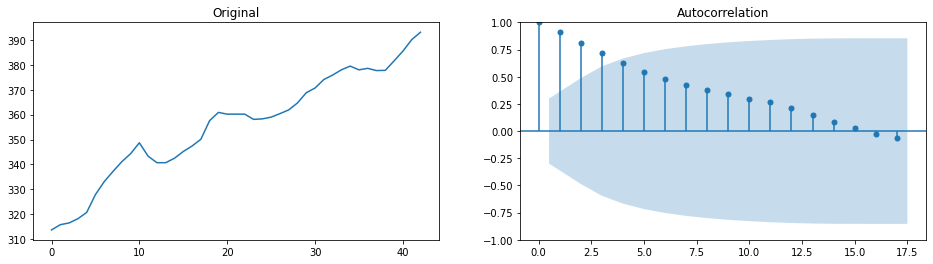

In [242]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Autocorrelation function
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(16, 4))

ax1.plot(newdata.CPI)
ax1.set_title("Original")
plot_acf(newdata.CPI, ax=ax2);
    

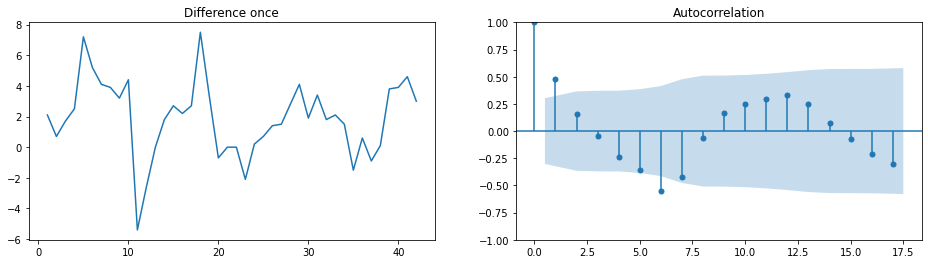

In [243]:
#Getting returns of CPI
diff = newdata.CPI.diff().dropna() # (d) = 1
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);



In [244]:
#Second differenetiation
#diff = newdata.CPI.diff().dropna()# second differentiation
#fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(16, 4))

#ax1.plot(diff)
#ax1.set_title("Difference twice")
#plot_acf(diff, ax=ax2)

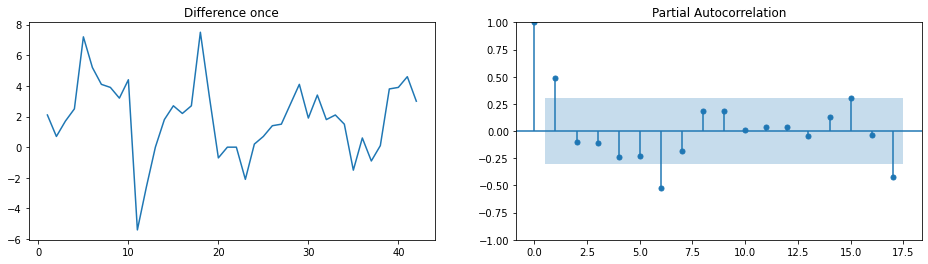

In [245]:
# Partial autocorrelation function PACF (p) = 1
from statsmodels.graphics.tsaplots import plot_pacf

diff = newdata.CPI.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff, ax=ax2);

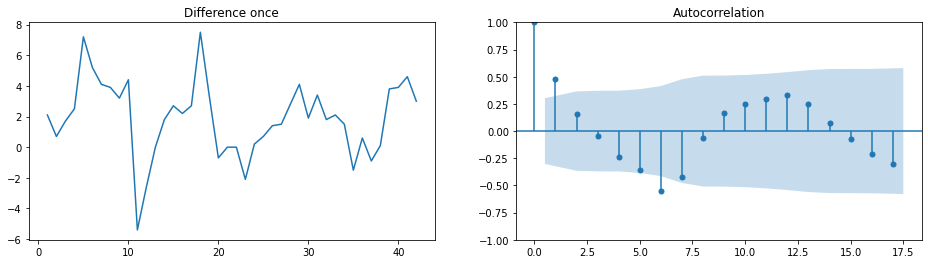

In [246]:
#ACF
#Moving average (q)=1
diff = newdata.CPI.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize =(16, 4))

ax1.plot(diff)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff, ax=ax2);

In [247]:
#Fitting the ARIMA model with preditor numbers p=1, d=1, q=1
#import statsmodels.api as sm

In [248]:
#ARIMA MODEL

import statsmodels.api as sm

# 1,1,1 ARIMA Model
model = sm.tsa.arima.ARIMA(newdata.CPI, order=(1,1,1))
result = model.fit()
print(result.summary())



                               SARIMAX Results                                
Dep. Variable:                    CPI   No. Observations:                   43
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -94.909
Date:                Wed, 27 Apr 2022   AIC                            195.817
Time:                        20:59:46   BIC                            201.030
Sample:                             0   HQIC                           197.728
                                 - 43                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6909      0.208      3.322      0.001       0.283       1.099
ma.L1         -0.0479      0.373     -0.128      0.898      -0.778       0.683
sigma2         5.3000      0.795      6.663      0.0

In [249]:
#plot residuals


In [108]:
dta = sm.datasets.sunspots.load_pandas().newdata
    dta.index = pd.date_range(start='2013-01', end='2016-07', freq='M')
    res = sm.tsa.ARMA(dta, (3, 0)).fit()
    fig, ax = plt.subplots()
    fig = res.plot_predict('2016-08', '2017-07', dynamic=True, ax=ax, plot_insample=False)
    plt.show()